# Module 12: Object-Oriented Programming
March 24, 2021

Last time we took a small detour to discuss regular expressions, which can be extremely useful for string processing and manipulation (not only in Python programs).

Today we will dive deeper into objects and object-oriented programming (OOP) in Python. We will see how to create own classes, discuss the concept of inheritance, and have a quick look at UML class diagrams. Furthermore, we will briefly talk about higher-order functions, which exploit that in Python also functions are objects.

Next time we will look at building graphical user interfaces and executables with Python, as third way of deploying Python programs (next to sharing code and notebooks as we did so far).

## Objects and Styles of Programming

First of all it is important to realize that we have worked with objects all the time, even though we were not so explicit about it until now. In Python anything used in a program is considered an object. Numbers, strings, complex data structures, functions, etc. They are all objects! In that sense, Python is a strongly object-oriented language.

Nevertheless we have followed a more procedure-oriented way of programming so far. That is, we used functions and modules to organize our different pieces of functionality that manipulate data. This style of programming (usually) works fine for small- to medium-size data analysis applications

When writing larger, more complex programs, it can however be advantageous to follow an object-oriented programming style. Essentially, the idea is to define own, application-specific data types to represent the relevant data, and implement the corresponding functionality along with them rather than in stand-alone functions. This development style is also supported by Python.

## OOP Terminology
Let’s introduce some terminology before we look at concrete examples:
*	**Classes** are basically pieces of code that represent entities of a domain. For example, if our application domain is university lectures, we might have classes to represent courses, lectures, students, teachers, etc. And all these classes have certain properties and behavior. For example, a student would have a name and an ID, and can enroll in courses.  
*	**Objects** are instances of classes. That might sound abstract, but we have seen that many times before. For example, when we define an integer variable n=2, we technically create an instance of class integer (with assigned value 2), so we have an integer object afterwards. As another example, when we create an empty set ```s = set()```, technically we create an instance of class ```Set```, so we have a set object afterwards. Analogously, we saw how to create an instance of class BeautifulSoup to have BeautifulSoup object as basis for scraping a web page. In the same way, we would create an instance of the ```Student``` class sketched above to represent a concrete student.
* **Fields** are variables that belong to a class or object. They can belong to the class in general (then they are called class variables) or to individual instances of the class (then called instance variables). For the example of the class ```Student```, a possible class variable is the total number of students. A specific student’s name or ID would be stored in an instance variable.
*  **Methods** are functions that belong to a class or object. For example, the ```Student``` class could provide a function to list all of the courses they are currently enrolled in, the amount of credit points collected so far, etc.
*	The **attributes** of a class are its fields and methods together.

We will see concrete examples of all this in the following.

### Creating Classes in Python

In Python classes can simply be created with the ```class``` statement. Here an example with a class ```Course``` that does nothing (yet):

In [1]:
class Course:
    pass #does nothing

pc = Course()
print(pc)

The first line defines the new class. Below this class statement follows an indented block of statement that is the implementation of the class, which is basically empty in this example. Then a new instance of the class is created (by using the name of the class and a pair of parentheses). The printout shows us that we have created an object of type ```PythonCourse``` (the number is its address in memory).

### Attributes
Like the functions we have worked with before, methods for classes are defined with the ```def``` keyword. For example:

In [2]:
class Course:    
    
    def printCourseName(self):
        print("Computational Thinking and Programming with Data " \
              "and Programming with Python")        
    
    def getCourseCode(self):
        return "INFOMCTH and INFOB2PWD and BETA-B1PYT"

pc = Course()
pc.printCourseName()
print(pc.getCourseCode()) 

Computational Thinking and Programming with Data and Programming with Python
INFOMCTH and INFOB2PWD and BETA-B1PYT


There is one difference, though: the ```self``` parameter that is used in both methods, but that is apparently not set by the calling code. ```self``` is a special kind of parameter, which is needed as first parameter for all methods defined by a class. As its name suggests, it refers to the object itself, and essentially it is technically needed by the Python interpreter to associate the method call to the right object at runtime.

There are a couple of predefined method names that have a specific meaning within Python classes (https://docs.python.org/3/reference/datamodel.html#special-method-names contains the full list).  An important one is the instantiation method ```__init__```, which is executed when an instance of the object is created. In the example above, we did not define an ```__init__``` method, so the default implementation was used (which creates a plain instance of the class). If we want to do something extra during instantiation, we can define an alternative ```__init__``` method (this is also called “overloading”). For example:


In [3]:
class Course:    
    
    def __init__(self,code,name):
        self.course_code = code
        self.course_name = name    
    
    def printCourseName(self):
        print(self.course_name)        
    
    def getCourseCode(self):
        return self.course_code
    
pc = Course("INFOMCTH and INFOB2PWD and BETA-B1PYT", \
            "Computational Thinking and Programming with Data" \
            "and Programming with Python")
pc.printCourseName()
print(pc.getCourseCode())

mc = Course("INFOMSO",
          "Modelleren en Systeemontwikkeling")
mc.printCourseName()
print(mc.getCourseCode())

Computational Thinking and Programming with Dataand Programming with Python
INFOMCTH and INFOB2PWD and BETA-B1PYT
Modelleren en Systeemontwikkeling
INFOMSO


The ```__init__``` method now has to be called with two additional arguments for setting the course code and name. They are then assigned to the instance variables ```course_code``` and ```course_name```, which are used by the (new versions of the) previously defined functions, too. Now the ```Course``` class can be used for basically any course, not only for INFOMCTH and INFOB2PWD and BETA-B1PYT anymore.

Instance variables (also sometimes called object variables) are owned by each individual instance of the class. In the example above, obviously ```pc``` and ```mc``` both have their own ```code``` and ```name```, which are not related to the values in the respective other object. This strong connection to the instance is made clear by using ```self``` when referring to the instance variables.

In the following extension of the example we also introduce a class variable:


In [1]:
class Course: 
    
    all_courses = set()    
    
    def __init__(self,code,name):
        self.course_code = code
        self.course_name = name
        Course.all_courses.add(self)    
    
    def printCourseName(self):
        print(self.course_name)        
    
    def getCourseCode(self):
        return self.course_code
    
    @classmethod
    def printAllCourses(cls):
        for course in cls.all_courses:
            course.printCourseName()
      
print("Current courses:")
Course.printAllCourses()    
print()

pc = Course("INFOMCTH and INFOB2PWD and BETA-B1PYT", \
            "Computational Thinking and Programming with Data " \
            "and Programming with Python")

print("Current courses:")
Course.printAllCourses()
print()

mc = Course("INFOMSO",
            "Modelleren en Systeemontwikkeling")

print("Current courses:")
Course.printAllCourses()

Current courses:

Current courses:
Computational Thinking and Programming with Data and Programming with Python

Current courses:
Computational Thinking and Programming with Data and Programming with Python
Modelleren en Systeemontwikkeling


The field ```all_courses``` is now a class variable that gets instantiated with an empty set. There is only one copy of this variable, shared by all instances of the class. That means that when one object changes ```all_courses```, the change is visible to all other instances of the class, too. In this example, every time an instance of the class is created, the ```__init__``` method adds the new instance to the set. In contrast to the instance variables, which are accessed via ```self```, the class variable is accessed using ```Course```, that is, the class name. Note that an instance variable with the same name as a class variable will hide the latter.

Furthermore, the example program now defines a class method ```printAllCourses```, which belongs to the class and not to its individual instances. The ```@classmethod``` decorator in the line just before the method definition makes this clear. Similar to the ```self``` parameter for the instance methods, this method has a parameter ```cls```, which is technically needed to tell the interpreter how to call it, but that is not passed as an argument by the calling code.

Another option for non-instance methods in classes are static methods. They can be used whenever it is not relevant to which class a method belongs. For example, we could add a static method ```getYear``` to the ```Course``` class, that happens to be part of the class, but is actually independent from all its fields and could from that perspective as well be part of another class, or simply a function in a module:


In [6]:
from datetime import date

class Course: 
    
    all_courses = set()    
    
    def __init__(self,code,name):
        self.course_code = code
        self.course_name = name
        Course.all_courses.add(self)    
    
    def printCourseName(self):
        print(self.course_name)        
    
    def getCourseCode(self):
        return self.course_code
    
    @classmethod
    def printAllCourses(cls):
        for course in cls.all_courses:
            course.printCourseName()
            
    @staticmethod
    def getYear():
        return date.today().year

print(Course.getYear()) 

2021


When you look at the documentation of the different libraries we have been using so far, you will notice that all these kinds of methods are used in practice.

### Inheritance

With the concept of inheritance, object-oriented programming offers another elegant way of reusing code. The idea is basically to establish and exploit a type-subtype relationship between classes. To give a real-world example (apologies to botanically knowledgeable people for being imprecise): trees, flowers and vegetables are all plants. That is, they have things in common (e.g. they have roots and leaves, they grow) and things that are different (e.g. trees have trunks, flowers have pretty blossoms, and vegetables can be used as food). 

In this example, plant is the *base type* or *base class*, and trees, flowers and vegetables are its *subtypes* or *subclasses*. Conversely, we can also say that plant is the *superclass* of the classes tree, flower and vegetable. Also, the latter might have further subclasses, for different kinds of trees, flowers, and vegetables. A class *inherits* the attributes of its superclass, that is, everything that holds for the superclass will also hold for the class itself. In terms of Python classes, it means that the fields and methods defined for a class will also be available for all of its subclasses, which might however define further attributes.

Without inheritance, this example might look in code as follows:

In [7]:
class Tree:    
    
    def __init__(self,kind,height,trunk_diameter):
        self.kind = kind
        self.height = height
        self.trunk_diameter = trunk_diameter
    
    def printKind(self):
        print(f"This is a {self.kind}.")        
    
    def printDetails(self):
        print(f"This {self.kind} has a height of {self.height} "
              f"and a trunk diameter of {self.trunk_diameter}.")
        
class Flower:
    
    def __init__(self,kind,color,number_of_blossoms):
        self.kind = kind
        self.color = color
        self.number_of_blossoms = number_of_blossoms
    
    def printKind(self):
        print(f"This is a {self.kind}.")        
    
    def printDetails(self):
        print(f"This {self.kind} is of color {self.color} and "
              f"has {self.number_of_blossoms} blossom(s).")

class Vegetable:
    
    def __init__(self,kind,season):
        self.kind = kind
        self.season = season
    
    def printKind(self):
        print(f"This is a {self.kind}.")
    
    def printDetails(self):
        print(f"This {self.kind} grows in {self.season}.")

elm = Tree("elm",10,0.75)
tulip = Flower("tulip","yellow",1)
tomato = Vegetable("tomato","summer")

elm.printKind()
elm.printDetails()    

tulip.printKind()
tulip.printDetails()   

tomato.printKind()
tomato.printDetails()   

This is a elm.
This elm has a height of 10 and a trunk diameter of 0.75.
This is a tulip.
This tulip is of color yellow and has 1 blossom(s).
This is a tomato.
This tomato grows in summer.


There is quite some redundancy in this implementation, because for example all classes define the instance variable ```kind``` and the methods ```printKind``` and ```printDetails```. While ```kind``` and ```printKind``` are exactly the same, ```printDetails``` is at least also very similar between all the classes. This is a common case where the implementation can be simplified by introducing a common superclass that contains what is the same. We can introduce a superclass ```Plant``` as follows:

In [9]:
class Plant:    
    
    def __init__(self,kind):
        self.kind = kind
    def printKind(self):
        print(f"This is a {self.kind}.")

class Tree(Plant):
    
    def __init__(self,kind,height,trunk_diameter):
        Plant.__init__(self,kind)
        self.height = height
        self.trunk_diameter = trunk_diameter
    
    def printDetails(self):
        print(f"This {self.kind} has a height of {self.height} and "
              f"a trunk diameter of {self.trunk_diameter}.")

class Flower(Plant):
    
    def __init__(self,kind,color,number_of_blossoms):
        Plant.__init__(self,kind)
        self.color = color
        self.number_of_blossoms = number_of_blossoms
    
    def printDetails(self):
        print(f"This {self.kind} is of color {self.color} and has "
              f"{self.number_of_blossoms} blossom(s).")

class Vegetable(Plant):
    
    def __init__(self,kind,season):
        Plant.__init__(self,kind)
        self.season = season
    
    def printDetails(self):
        print(f"This {self.kind} grows in {self.season}.")

elm = Tree("elm",10,0.75)
tulip = Flower("tulip","yellow",1)
tomato = Vegetable("tomato","summer")

elm.printKind()
elm.printDetails()    

tulip.printKind()
tulip.printDetails()   

tomato.printKind()
tomato.printDetails()   

This is a elm.
This elm has a height of 10 and a trunk diameter of 0.75.
This is a tulip.
This tulip is of color yellow and has 1 blossom(s).
This is a tomato.
This tomato grows in summer.


Obviously, this leads to the same object instantiation and output as above.

The new Plant class defines the joint ```__init__``` and ```printKind``` methods. By adding ```(Plant)``` to the definition of the other three classes, we make them inherit from ```Plant``` (which thus becomes their superclass). Without defining ```kind``` and ```printKind``` again, the attributes are available for the ```Tree```, ```Flower``` and ```Vegetable``` objects. We don’t inherit the ```__init__``` method, however, because we define new ones for all classes. Thus we have to call the ```__init__``` method of the superclass ourselves if we want to use it. Note that in this example, the ```printDetails``` method exists in all classes, but is not part of the superclass, so if we would define a new subclass of ```Plant```, it would not automatically support this method. If desired, we could make it a method of the superclass, of course. That’s a design choice that needs to be taken.

The advantage of this design is now that with less redundant code, it will be easier to define new classes, and also making changes in case we want to, e.g., change the printout text of the ```printKind``` function.

A class can also inherit from multiple superclasses. As an extension of the example above, we could have multiple inheritance for the class ```Vegetable```, which inherits from the ```Plant``` and ```Food``` superclasses:

In [10]:
class Plant:    
    
    def __init__(self,kind):
        self.kind = kind
    
    def printKind(self):
        print(f"This plant is a {self.kind}.")

class Food:    
    
    def __init__(self,name):
        self.name = name
    
    def printName(self):
        print(f"This food is a {self.name}.")

class Vegetable(Plant,Food):
    
    def __init__(self,kind,season):
        Plant.__init__(self,kind)
        Food.__init__(self,kind)
        self.season = season        
    
    def printDetails(self):
        print(f"This {self.kind} grows in {self.season}.")

tomato = Vegetable("tomato","summer")
tomato.printKind()
tomato.printName()
tomato.printDetails()   

This plant is a tomato.
This food is a tomato.
This tomato grows in summer.


## By the way: Class Diagrams

In the beginning of the course we used UML Activity Diagrams to describe the control-flow structure of processes. UML actually comprises several other kinds of diagrams. One of them, the so-called Class Diagrams, have been designed as a means for representing the relationship of classes in object-oriented programs. For the example from above, a simple and basic UML Class Diagram looks like this:

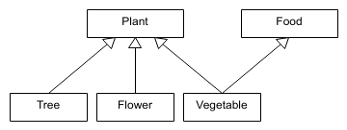


The rectangular boxes represent the different classes, and the arrows represent the inheritance relationships. For example, ```Flower``` inherits from ```Plant```, or also “```Flower``` is a ```Plant```” in a more natural formulation.

It is also possible to include information about the classes’ attributes in a class diagram. For the same example, a more detailed diagram could look like this:

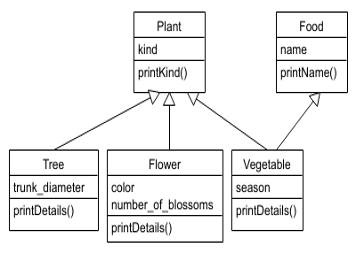

The inheritance relationships are exactly the same as before, but now each box gives information about the classes’ fields (in the middle part) and methods (in the lower part). We can see, for example, that ```Plant``` has a field ```kind```, and that ```Flower``` has a field ```number_of_blossoms```. The ```__init__``` methods are not included here (can be done if desired, though), and the different ```print*``` methods have no input parameters. Based on the definition of inheritance, we also know that the attributes of the superclasses are available in their subclasses, too.

When OO programs get more complex, it can be very helpful to visualize the class relationships with the help of Class Diagrams to keep track of what is going on.

## Higher-Order Functions

The fact that in Python also functions are (first-class) objects has some interesting further implications. In particular, it is possible to pass one or more functions as an argument to another function, and functions can return functions as a result. Functions that do at least one of these two things are called *higher-order functions*.

One of the built-in higher order functions in Python is ```map``` (https://docs.python.org/3/library/functions.html#map), which takes a function and an iterable object as input,  and applies the function to all objects in the iterable. It returns an (iterable) ```map``` object, which can simply be casted to e.g. a list. See the following example:

In [11]:
def celsius2fahrenheit(temp):
    return (9/5) * temp + 32

temps = [34.5, 23.6, 78.7, 34.3, 99.9, 23.7, 42.6]
temps_f = map(celsius2fahrenheit,temps)
print(temps_f)
print(list(temps_f)) 

[94.1, 74.48, 173.66, 93.74, 211.82000000000002, 74.66, 108.68]


We define a function ```celsius2fahrenheit``` as we have seen before. Then we create a list of temperatures to be converted. However, instead of iterating over the list and calling the function for each item in it, we now call the ```map``` function with the ```celsius2fahrenheit``` function and the list as parameters. The result is a ```map``` object, which we cast to a list object to be able to easily print its content.

For simple functions like this, *lambda functions* can be used instead of conventionally defined functions. Lambda functions are anonymous, that is, they don’t have a name and are just usable at the point in the program where they have been created. Here is the above example implemented with a lambda function:

In [12]:
temps = [34.5, 23.6, 78.7, 34.3, 99.9, 23.7, 42.6]
temps_f = map(lambda x: (9/5) * x + 32, temps)
print(temps_f)
print(list(temps_f))

[94.1, 74.48, 173.66, 93.74, 211.82000000000002, 74.66, 108.68]


Lambda functions have the following generic form:

	lambda <argument_list>: <expression>
    
That is, the keyword ```lambda``` is followed by a comma-separated list of input arguments, followed by a : and then an expression that uses the arguments and results in the desired value. Lambda functions don’t have a name themselves, but they can be assigned to a variable and used and be used later in functions like ```map```:


In [13]:
c2f = lambda x: (9/5) * x + 32
temps = [34.5, 23.6, 78.7, 34.3, 99.9, 23.7, 42.6]
temps_f = map(c2f,temps)
print(temps_f)
print(list(temps_f))

[94.1, 74.48, 173.66, 93.74, 211.82000000000002, 74.66, 108.68]


Note that ```map``` can be used to apply the function to more than one iterable. If they are of different length, however, ```map``` will stop applying the function after the shortest/smallest iterable object has been processed.

Similar to ```map```, the function ```filter``` (see https://docs.python.org/3/library/functions.html#filter) can be used to apply a function to a sequence of objects to filter out those for which the function returns ```True``` (and discard the rest). Hence, the function used as parameter for filter needs to return a Boolean value. The following example shows how this can be used to obtain all temperatures above 50 degrees Celsius from a list of temperatures:

In [14]:
temps = [34.5, 23.6, 78.7, 34.3, 99.9, 23.7, 42.6]
temps_50plus = filter(lambda x: x>=50, temps)
print(temps_50plus)
print(list(temps_50plus))

[78.7, 99.9]


Note that historically, ```lambda``` functions as well as ```map``` and ```filter``` have been included in Python as a result of lobbying from Lisp programmers. They have remained in it until now and are still quite frequently used in practice, but some Python developers actually prefer to use a technique called “list comprehension” (https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). With list comprehension, the Celsius-to-Fahrenheit conversion example from above could be implemented as follows:

In [15]:
temps = [34.5, 23.6, 78.7, 34.3, 99.9, 23.7, 42.6]
temps_f = [ (9/5) * x + 32 for x in temps ]
print(temps_f)


[94.1, 74.48, 173.66, 93.74, 211.82000000000002, 74.66, 108.68]


The filter example could become:

In [16]:
temps_50plus = [ x for x in temps if x >= 50 ]
print(temps_50plus)

[78.7, 99.9]


List comprehensions have the following basic form:

	[ <expression> for <var> in <iterable> ]
    
Additionally, further for-loops and if statements can be included to express further constraints. The result is a list with the results from evaluating the expression in the context of the for and if clauses in the comprehension statement.

Some people prefer lambda expressions with map and filter, while others find list comprehension easier to use. It seems to be a matter of personal preference in the first place, so feel free to use the one that you find more intuitive. A somewhat elaborate discussion of the topic can be found at https://towardsdatascience.com/understanding-the-use-of-lambda-expressions-map-and-filter-in-python-5e03e4b18d09.


## Exercises

Please use Quarterfall to submit and check your answers. 

### 1. Room Occupancy Revisited (★★★★☆)
In one of the exercises for Module 7 (Data Structures) you wrote a small program managing the room occupancy of a small hotel. Back then you used dictionaries for keeping the data, which is a fair approach, but actually it is better style to define own, purpose-specific data structures (classes). Here is a slight variant of the exercise, following an object-oriented programming paradigm:

Imagine a small hostel with four rooms (with the arbitrarily chosen numbers 101, 102, 201, and 202). You want to write a little program for the hostel staff to help them keep track of the room occupancy and checking guests in and out. The code for the user interaction already exists (see below), but you still need to implement the class `Room` and its attributes:
* A class variable `all_rooms` that keeps track of all rooms created.
* An `__init__` method that creates a new room (with empty list of guests) given a room number and maximum number of guests.
* A class method `printOccupancy` that prints out all rooms and the guests that are currently checked in.
* A class method `getRoom` that returns the corresponding `Room` object (if it exists).
* An instance method `checkIn` to check in a guest to the room. If the chosen room is already full, a corresponding message should be printed. It is allowed to have two (or more) two guests with the same name in one room. 
* An instance method `checkOut` to check out a guest from the room. If the guest is not checked in in the room, a corresponding messages should be printed.

The following code shows how the class `Room` is used. You can also use it to test your implementation:

```
################
# Main program #
################

# create some rooms
Room(101, 4)
Room(102, 2)
Room(201, 3)
Room(202, 2)

# do things with the rooms
while True:
    print("These are your options:")
    print("1 - View current room occupancy.")
    print("2 - Check guest in.")
    print("3 - Check guest out.")
    print("4 - Exit program.")
    choice = input("Please choose what you want to do: ") 
    if choice == "1":
        Room.printOccupancy()
    elif choice == "2":
        guest = input("Enter name of guest: ")
        number = int(input("Enter room number: "))
        room = Room.getRoom(number)
        if room != None:
            room.checkIn(guest)
        else:
            print("Not a valid room number.")
    elif choice == "3":
        guest = input("Enter name of guest: ")
        number = int(input("Enter room number: "))
        room = Room.getRoom(number)
        if room != None:
            room.checkOut(guest)
        else:
            print("Not a valid room number.")
    elif choice == "4":
        print("Goodbye!")
        break
    else:
        print("Invalid input, try again.")
```





### 2. People at the University (★★★★☆)

Define and implement a set of classes for representing people at a university according to the UML Class Diagram below. 

![](img/uml_university.png)

The base class `Person` provides a field `name` and a function to print information about the person (i.e., the name). The classes `Student` and `Lecturer` are derived from `Person`. A `Student` is a `Person` that in addition has a `university`, a study `program` and a number of `creditpoints`. The class `Student` also has a `printInfo` function, which displays information about the university and program in addition to the student’s name. With the functions `setCreditPoints` and `getCreditPoints` the credit points of the student can be set and retrieved. `BachelorStudent` and `MasterStudent` are subclasses of `Student`. Bachelor students have additional information about the place where they went to `school` before university. Master students have information about their Bachelor’s degree (field `bdegree`). Lecturers are affiliated with a `department` at a university. Their `printInfo` function includes these information, too. Finally, `TeachingAssistants` are both `Students` and `Lecturers`, and thus have the attributes of both superclasses.

The real person models in UU’s IT systems are of course more involved, but this gives you an idea of the things to think about when designing such systems. :)

You can use the following code to test your classes:
```
student1 = BachelorStudent("Alice", "UU", "Biology", "Amsterdam")
student2 = MasterStudent("Bob", "UU", "Chemistry", "Biophysics")
lecturer = Lecturer("Cindy","UU","Information and Computing Sciences")
ta = TeachingAssistant("Dennis", "UU", "Computer Science", "Information and Computing Sciences")
student1.printInfo()
student1.setCreditPoints(150)
print(f"{student1.name} has {student1.getCreditPoints()} points.")
student2.printInfo()
student2.setCreditPoints(45)
print(f"{student2.name} has {student2.getCreditPoints()} points.")
lecturer.printInfo()
ta.printInfo()
print(f"{ta.name} has {ta.getCreditPoints()} points.")
```
The output should be something like:

```
I am Alice.
I am a student at UU. I study Biology.
I went to school in Amsterdam.
Alice has 150 credit points.
I am Bob.
I am a student at UU. I study Chemistry.
I have a Bachelor's degree in Biophysics.
Bob has 45 credit points.
I am Cindy.
I am a lecturer at UU, Information and Computing Sciences.
I am Dennis.
I am a lecturer at UU, Information and Computing Sciences.
I am also a student of Computer Science. Sciences.
Dennis has None points.
```

### 3. Text Analysis with Higher-Order Functions (★★★★☆)
Take the following code (already used on Worksheet 3) as start of a Python program:
```
# input text
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do \
eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad \
minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex \
ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate \
velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat \
cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id \
est laborum."

# split text into words
words = text.split()
```

Continue the program as follows:
Use `map` to strip the remaining “,” and “.” characters from the words.
Create a list of the lengths of all words in the text. Implement this functionality in three different ways: 
1. using a for-loop, 
2. using map, 
3. using list comprehension. 

Use `filter` to get the long words (10 characters or more) from the list.
Print out the results of each step. 
The output should be something like: 
```
Strip words:
['Lorem', 'ipsum', 'dolor', 'sit', 'amet', 'consectetur', 'adipiscing', 'elit', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua', 'Ut', 'enim', 'ad', 'minim', 'veniam', 'quis', 'nostrud', 'exercitation', 'ullamco', 'laboris', 'nisi', 'ut', 'aliquip', 'ex', 'ea', 'commodo', 'consequat', 'Duis', 'aute', 'irure', 'dolor', 'in', 'reprehenderit', 'in', 'voluptate', 'velit', 'esse', 'cillum', 'dolore', 'eu', 'fugiat', 'nulla', 'pariatur', 'Excepteur', 'sint', 'occaecat', 'cupidatat', 'non', 'proident', 'sunt', 'in', 'culpa', 'qui', 'officia', 'deserunt', 'mollit', 'anim', 'id', 'est', 'laborum']

Get word lengths with for-loop:
[5, 5, 5, 3, 4, 11, 10, 4, 3, 2, 7, 6, 10, 2, 6, 2, 6, 5, 6, 2, 4, 2, 5, 6, 4, 7, 12, 7, 7, 4, 2, 7, 2, 2, 7, 9, 4, 4, 5, 5, 2, 13, 2, 9, 5, 4, 6, 6, 2, 6, 5, 8, 9, 4, 8, 9, 3, 8, 4, 2, 5, 3, 7, 8, 6, 4, 2, 3, 7]

Get word lengths with map:
[5, 5, 5, 3, 4, 11, 10, 4, 3, 2, 7, 6, 10, 2, 6, 2, 6, 5, 6, 2, 4, 2, 5, 6, 4, 7, 12, 7, 7, 4, 2, 7, 2, 2, 7, 9, 4, 4, 5, 5, 2, 13, 2, 9, 5, 4, 6, 6, 2, 6, 5, 8, 9, 4, 8, 9, 3, 8, 4, 2, 5, 3, 7, 8, 6, 4, 2, 3, 7]

Get word lengths with list comprehension:
[5, 5, 5, 3, 4, 11, 10, 4, 3, 2, 7, 6, 10, 2, 6, 2, 6, 5, 6, 2, 4, 2, 5, 6, 4, 7, 12, 7, 7, 4, 2, 7, 2, 2, 7, 9, 4, 4, 5, 5, 2, 13, 2, 9, 5, 4, 6, 6, 2, 6, 5, 8, 9, 4, 8, 9, 3, 8, 4, 2, 5, 3, 7, 8, 6, 4, 2, 3, 7]

Longest words:
['consectetur', 'adipiscing', 'incididunt', 'exercitation', 'reprehenderit']
```

## Extras
We discussed in the lecture that in Python everything is an object, and that also functions are objects that can be assigned to variables and used with higher-order functions (remember lambda, map, filter, …). All this is a bit different than “normal”, procedural Python, and has in fact been inspired by a programming paradigm that is called “functional programming”. If you want to read up a bit more on this programming style and how it is supported in Python, have a look at https://kite.com/blog/python/functional-programming.